In [255]:
import pandas as pd
import numpy as np
import altair as alt
from altair import datum
import baltic as bt
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Polygon

from datetime import datetime as dt
from datetime import timedelta

In [130]:
def enumerate_migration_events(tree):
        
    output_dict = {}
    migration_events_counter = 0
        
    for k in tree.Objects:
#         if k.traits == {}:
#             k.traits = {'obs': 0.0, 'ns_kc':"root"}
#         elif k.traits['obs'] ==  0.0:
#             k.traits = {'obs': 0.0, 'ns_kc':"none"}
        
        trait = k.traits['ns_kc']
        parent_node = k.parent
        if ('root' in parent_node.traits) or (parent_node.traits == {}) :
            parent_trait = "root"
        
        # only write out migration events that are not from root to deme
        elif (trait == "South_King_County") or (trait == "North_King_County"):


        
            parent_trait = parent_node.traits['ns_kc']
            
            if (trait != parent_trait):
                if (parent_trait != "South_King_County") and (parent_trait != "North_King_County"):
                    migration_events_counter += 1
                    migration_event = parent_trait + "-to-" + trait
                    migration_date = parent_node.absoluteTime  



                    # write to output dictionary
                    output_dict[migration_events_counter] = {"type":migration_event, "date":migration_date, 
                                                            "parent_host":parent_trait,
                                                            "child_host": trait}
    
    return(output_dict)

In [133]:
#need to convert the decimal dates back to calendar dates 
def convert_partial_year(number):

    year = int(number)
    d = timedelta(days=(number - year)*(365 + is_leap(year)))
    day_one = dt(year,1,1)
    date = d + day_one
    date = dt.strftime(date, '%Y-%m-%d')
    return date

In [134]:
def is_leap(number):
    if number == 2020:
        leap = 1
    else:
        leap = 0
    return leap

In [135]:
def convert_format(number):
    date = dt.strptime(number, '%Y-%m-%d')
    date = dt.strftime(date, '%Y-%m')
    return date

In [139]:
 def plot_quick_tree(tree):   
    fig,ax = plt.subplots(figsize=(10,20),facecolor='w')

    x_attr=lambda k: k.absoluteTime ## x coordinate of branches will be absoluteTime attribute
    #c_func=lambda k: 'indianred' if k.traits['PB1']=='V' else 'steelblue' ## colour of branches
    s_func=lambda k: 50-30*k.height/ll.treeHeight ## size of tips

    ll.plotTree(ax,x_attr=x_attr,colour=c_func) ## plot branches
    ll.plotPoints(ax,x_attr=x_attr,size=s_func,zorder=100) ## plot circles at tips

    #ax.set_ylim(-5,ll.ySpan+5)
    plt.show()

In [306]:
def source_of_intro(tree):

    json_translation={'absoluteTime':lambda k: k.traits['node_attrs']['num_date']['value'],'name':'name'} ## allows baltic to find correct attributes in JSON, height and name are required at a minimum
    #json_meta={'file':meta,'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
    ll,meta=bt.loadJSON(tree,json_translation=json_translation) ## give loadJSON the name of the tree file, the translation dictionary and (optionally) the meta file


    plot_quick_tree(ll)
    
    #pull out migration events labeling parent and child nodes
    migrations_dict = enumerate_migration_events(ll)
    migrations_df = pd.DataFrame.from_dict(migrations_dict).T
    migrations_df.reset_index(inplace=True)
        
    migrations_df.child_host[migrations_df.child_host == "North_King_County"] = "North King County" 
    migrations_df.child_host[migrations_df.child_host == "South_King_County"] = "South King County" 

    #convert decimal year into year-month
    migrations_df['calendar_date'] = migrations_df.date.map(convert_partial_year)
    migrations_df['year-month'] = migrations_df['calendar_date'].map(convert_format)
    
    return(migrations_df)


Tree height: 2.402729
Tree length: 1483.016192
annotations present

Numbers of objects in tree: 35446 (17006 nodes and 18440 leaves)



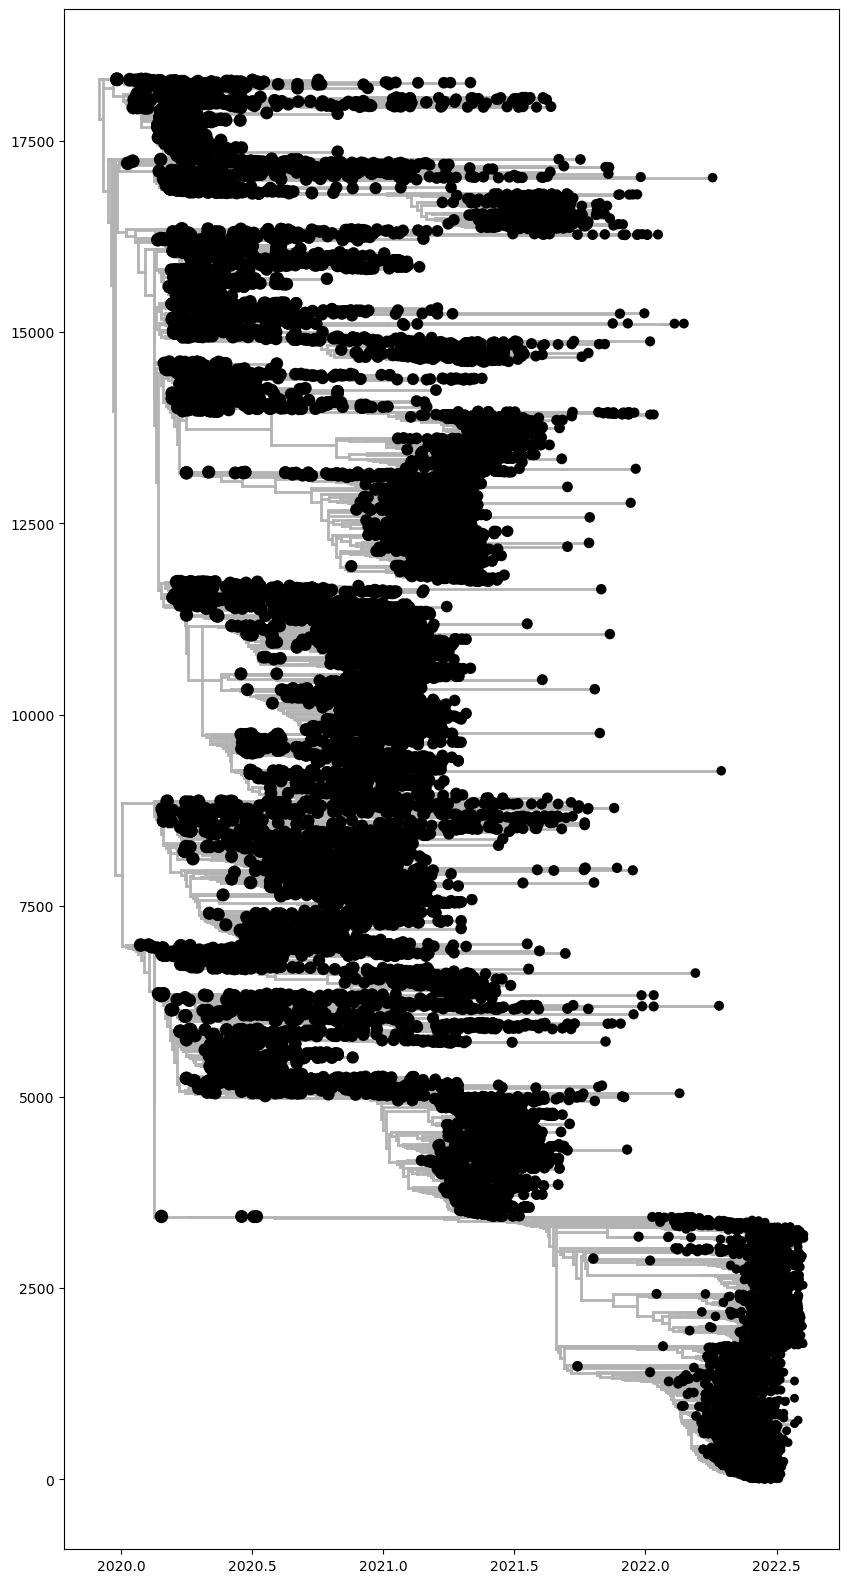

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_477/2494559653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrations_df.child_host[migrations_df.child_host == "North_King_County"] = "North King County"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_477/2494559653.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrations_df.child_host[migrations_df.child_host == "South_King_County"] = "South King County"



Tree height: 2.633705
Tree length: 2326.109713
annotations present

Numbers of objects in tree: 42905 (20537 nodes and 22368 leaves)



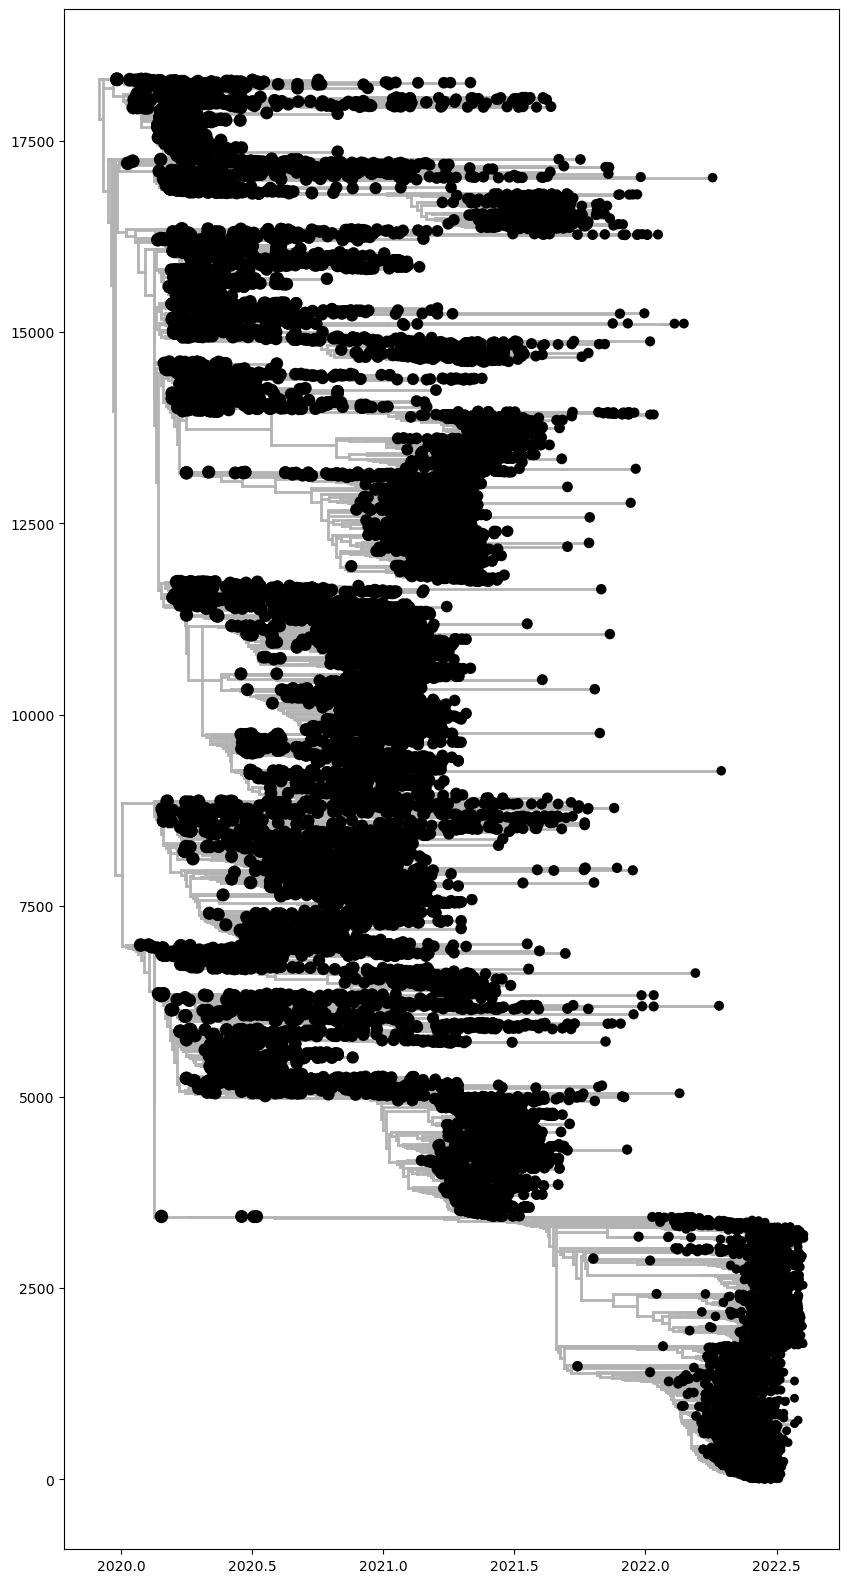

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_477/2494559653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrations_df.child_host[migrations_df.child_host == "North_King_County"] = "North King County"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_477/2494559653.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrations_df.child_host[migrations_df.child_host == "South_King_County"] = "South King County"



Tree height: 2.658406
Tree length: 1513.402866
annotations present

Numbers of objects in tree: 40455 (19496 nodes and 20959 leaves)



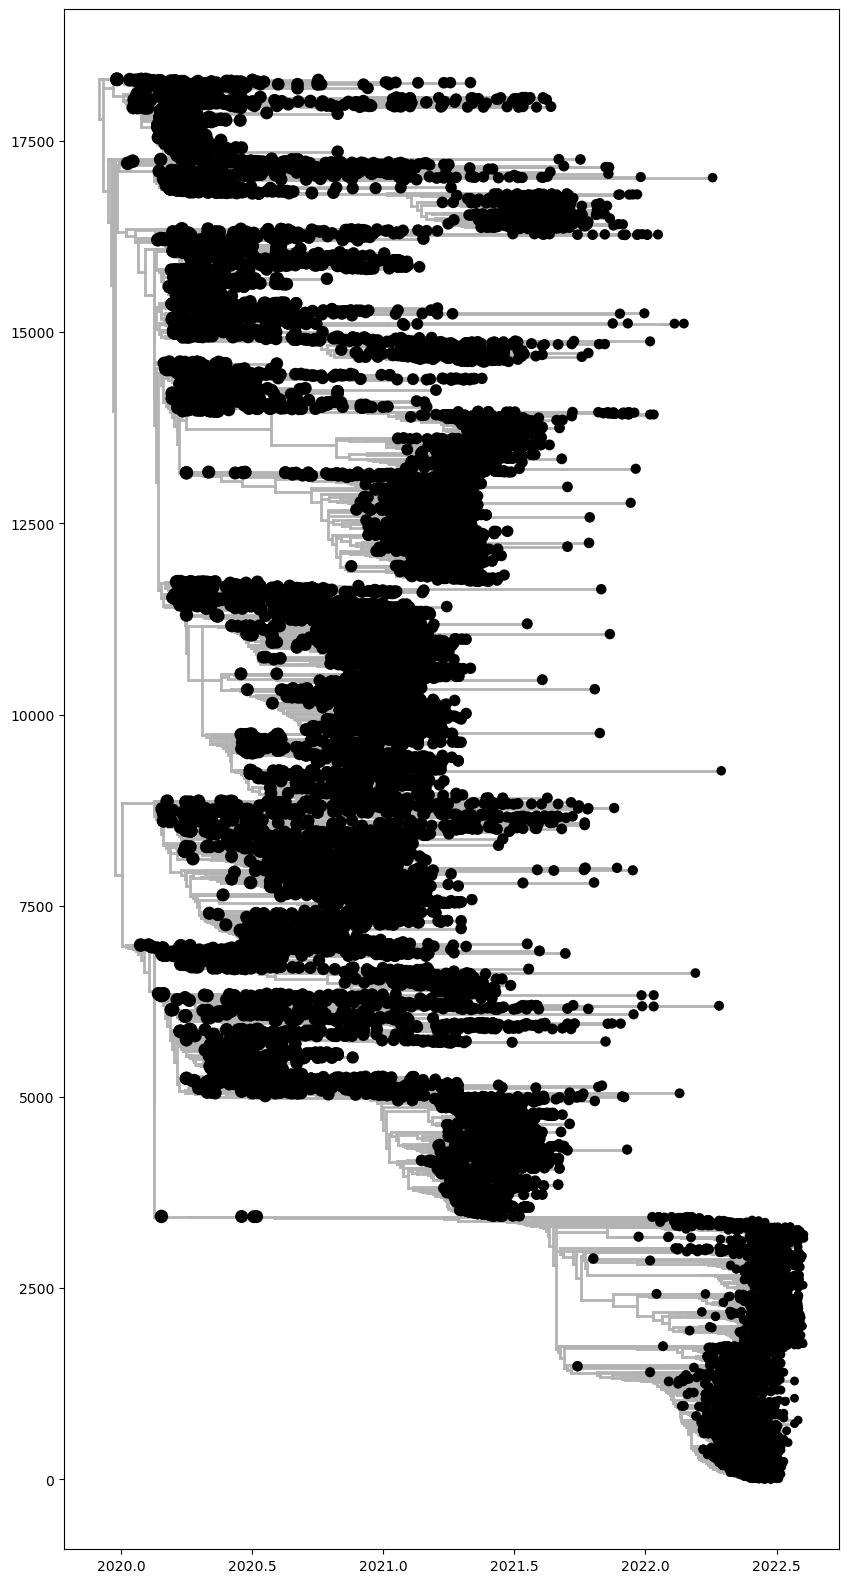

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_477/2494559653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrations_df.child_host[migrations_df.child_host == "North_King_County"] = "North King County"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_477/2494559653.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrations_df.child_host[migrations_df.child_host == "South_King_County"] = "South King County"



Tree height: 2.686368
Tree length: 1783.811191
annotations present

Numbers of objects in tree: 34840 (16533 nodes and 18307 leaves)



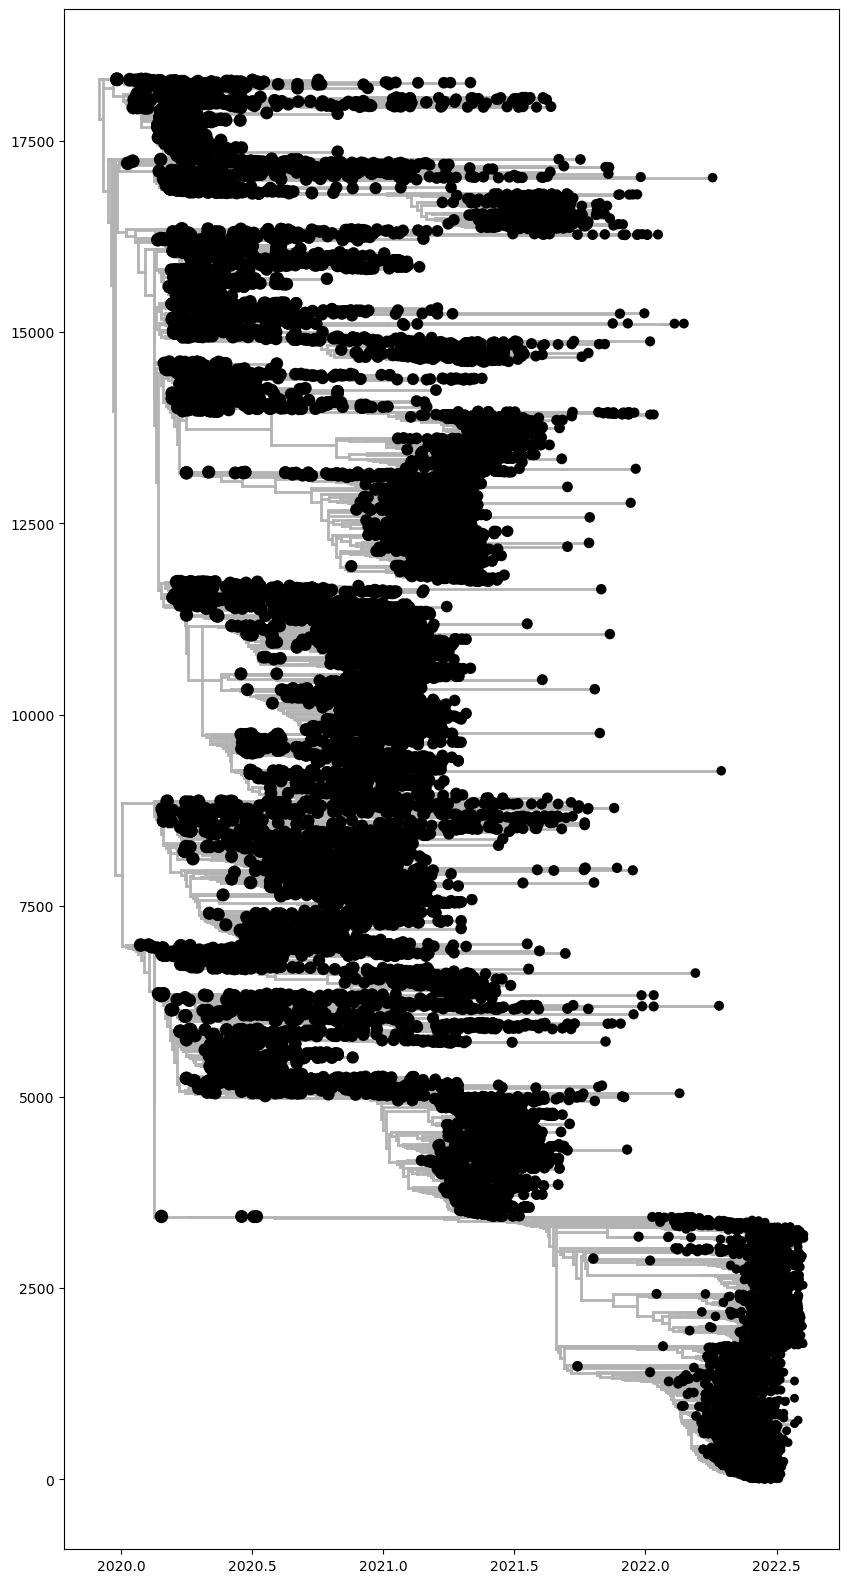

/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_477/2494559653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrations_df.child_host[migrations_df.child_host == "North_King_County"] = "North King County"
/var/folders/h9/0347drb57tsgxzbddmvmlvf80000gp/T/ipykernel_477/2494559653.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migrations_df.child_host[migrations_df.child_host == "South_King_County"] = "South King County"


In [307]:
list_trees = ["/Users/mparedes/Desktop/dta_kc_variant_trees/new_alpha.json", "/Users/mparedes/Desktop/dta_kc_variant_trees/new_delta.json", "/Users/mparedes/Desktop/dta_kc_variant_trees/new_omicron.json", "/Users/mparedes/Desktop/dta_kc_variant_trees/new_other.json"]
variant_dict = {}
for tree in list_trees:
    name = tree.split("/")[-1].split(".")[0]
    variant_dict[name] = source_of_intro(tree)
    



In [186]:
variant_dict

{'new_alpha':       index                             type         date parent_host  \
 0         1      Europe-to-North_King_County  2021.071442      Europe   
 1         2      Europe-to-North_King_County  2021.318997      Europe   
 2         3      Europe-to-North_King_County  2020.894585      Europe   
 3         4  Washington-to-South_King_County  2021.316155  Washington   
 4         5  Washington-to-North_King_County  2021.140362  Washington   
 ...     ...                              ...          ...         ...   
 1333   1334  Washington-to-South_King_County   2021.30274  Washington   
 1334   1335  Washington-to-North_King_County  2021.308219  Washington   
 1335   1336  Washington-to-South_King_County  2021.316132  Washington   
 1336   1337  Washington-to-North_King_County  2021.288962  Washington   
 1337   1338  Washington-to-South_King_County  2021.288962  Washington   
 
              child_host calendar_date year-month  
 0     North_King_County    2021-01-27    202

In [279]:
tree1 = "/Users/mparedes/Desktop/dta_kc_variant_trees/new_other.json"


json_translation={'absoluteTime':lambda k: k.traits['node_attrs']['num_date']['value'],'name':'name'} ## allows baltic to find correct attributes in JSON, height and name are required at a minimum
#json_meta={'file':meta,'traitName':'region'} ## if you want auspice stylings you can import the meta file used on nextstrain.org
ll,meta=bt.loadJSON(tree1,json_translation=json_translation) ## give loadJSON the name of the tree file, the translation dictionary and (optionally) the meta file




Tree height: 2.686368
Tree length: 1783.811191
annotations present

Numbers of objects in tree: 34840 (16533 nodes and 18307 leaves)



In [292]:
for k in ll.Objects:
    print(k.traits)

{'name': 'NODE_0000002', 'node_attrs': {'div': 0, 'num_date': {'value': 2019.917741678794, 'confidence': [2019.8234645678388, 2019.9494764252597]}, 'ns_kc': {'value': 'Asia', 'confidence': {'Asia': 0.997841270524973, 'North America': 0.0012176353703572758}, 'entropy': 0.017847749288615457}}, 'branch_attrs': {}, 'divergence': 0, 'num_date': 2019.917741678794, 'num_date_confidence': [2019.8234645678388, 2019.9494764252597], 'ns_kc': 'Asia', 'ns_kc_confidence': {'Asia': 0.997841270524973, 'North America': 0.0012176353703572758}}
{'name': 'Wuhan/Hu-1/2019', 'node_attrs': {'div': 0, 'num_date': {'value': 2019.9849315068493, 'confidence': [2019.9849315068493, 2019.9849315068493]}, 'url': 'https://www.epicov.org/acknowledgement/21/25/EPI_ISL_402125.json', 'author': {'author': 'Zhang et al', 'title': 'A new coronavirus associated with human respiratory disease in China', 'paper_url': 'https://dx.doi.org/10.1038/s41586-020-2008-3', 'value': 'Zhang et al'}, 'Puma': {'value': 'Asia'}, 'division_e

{'name': 'USA/WA-S10/2020', 'node_attrs': {'div': 5, 'num_date': {'value': 2020.1625683060108, 'confidence': [2020.1625683060108, 2020.1625683060108]}, 'url': 'https://www.epicov.org/acknowledgement/64/65/EPI_ISL_416465.json', 'author': {'author': 'Chu et al', 'title': 'Cryptic transmission of SARS-CoV-2 in Washington State', 'paper_url': 'https://doi.dx.org/10.1101/2020.04.02.20051417', 'value': 'Chu et al B'}, 'Puma': {'value': 'Washington'}, 'division_exposure': {'value': 'Washington'}, 'AGE_DECADE': {'value': 'Age 40-49', 'confidence': {'Age 40-49': 1.0}, 'entropy': -1.000088900581841e-12}, 'submitting_lab': {'value': 'Seattle Flu Study'}, 'host': {'value': 'Human'}, 'gisaid_epi_isl': {'value': 'EPI_ISL_416465'}, 'originating_lab': {'value': 'Seattle Flu Study'}, 'location': {'value': 'King County WA'}, 'country': {'value': 'USA'}, 'genbank_accession': {'value': 'MT598641.1'}, 'region_exposure': {'value': 'North America'}, 'ns_kc': {'value': 'Washington', 'confidence': {'Washington

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'name': 'NODE_0012343', 'node_attrs': {'div': 8, 'num_date': {'value': 2020.6666619409427, 'confidence': [2020.5123772335537, 2020.7963210606736]}, 'ns_kc': {'value': 'Asia', 'confidence': {'Asia': 0.765616834933154, 'Europe': 0.17387726251562052, 'Oceania': 0.050185283776022965, 'South America': 0.005664533729254847}, 'entropy': 0.7174573413488416}}, 'branch_attrs': {}, 'divergence': 8, 'num_date': 2020.6666619409427, 'num_date_confidence': [2020.5123772335537, 2020.7963210606736], 'ns_kc': 'Asia', 'ns_kc_confidence': {'Asia': 0.765616834933154, 'Europe': 0.17387726251562052, 'Oceania': 0.050185283776022965, 'South America': 0.005664533729254847}}
{'name': 'SolomonIslands/SOL007/2020', 'node_attrs': {'div': 9, 'num_date': {'value': 2020.8784153005465, 'confidence': [2020.8784153005465, 2020.8784153005465]}, 'url': 'https://www.epicov.org/acknowledgement/18/89/EPI_ISL_4771889.json', 'author': {'author': 'Jilini et al', 'value': 'Jilini et al'}, 'Puma': {'value': 'Oceania'}, 'division_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [170]:
alt.Chart(test_df).mark_area(interpolate = "monotone").encode(
    alt.X("year-month"),
    alt.Y("count()", stack = "normalize"),
    alt.Color("parent_host:N"),
    alt.Column("child_host:N")
)

alt.Chart(...)

In [327]:

# Assuming variant_dict is a dictionary of DataFrames

charts = []
for df_name, df in variant_dict.items():

    chart = alt.Chart(df).transform_aggregate(
    count='count()',
    groupby=["child_host",'year-month', "parent_host"]
    ).transform_filter(
    'datum.count >= 1'
    ).mark_area(interpolate="monotone").encode(
        alt.X("year-month:T", title="",  axis=alt.Axis(title=None, grid=False, tickCount = "month",format="%B %Y")),  # Assuming "year-month" is a time field
        alt.Y("count:Q", stack="normalize", axis=alt.Axis(title="Percent of Total Introductions", grid=False, format='%')),  # Assuming "count()" is a quantitative field
        alt.Color("parent_host:N", title="Source of Introduction"),
        alt.Column("child_host:N", title = "", spacing =50)
    
    ).properties(
        title=df_name.split("_")[1]
    )  # Add title for each chart based on DataFrame name

    charts.append(chart)

# Concatenate charts horizontally
concatenated_chart = alt.vconcat(*charts, spacing=10).resolve_scale(x = "independent")

# Display the concatenated chart
concatenated_chart.configure_title(
    anchor='start', fontSize= 20
).configure_axis(
    labelFontSize=16,
    titleFontSize=16
).configure_legend(
    labelFontSize = 16,
    titleFontSize = 16
).configure_header(
    labelFontSize =16)


alt.VConcatChart(...)